In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 27)
pd.set_option('display.width', 1000)
print('asss')

asss


In [32]:
#loading and selection of best fit columns from jdt.csv
jdt_df = pd.read_csv("zxing.csv")
print(jdt_df.info())
jdt_df_1 = jdt_df.iloc[:,1:27]
jdt_labels = jdt_df.iloc[:,27]
#print(jdt_labels)
best_features = SelectKBest(score_func=chi2, k=15)
jdt_fit = best_features.fit_transform(jdt_df_1,jdt_labels)
jdt_fit_columns = best_features.get_support(indices=True)
jdt_fit_column_names = list(jdt_df.columns)
jdt_fit_selected_columns_name = []
for jdt_fit_column in jdt_fit_columns:
    jdt_fit_selected_columns_name.append(jdt_fit_column_names[jdt_fit_column])
print(jdt_fit_selected_columns_name)
print('asss')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     399 non-null    int64  
 1   AvgCyclomatic          399 non-null    int64  
 2   AvgCyclomaticModified  399 non-null    int64  
 3   AvgCyclomaticStrict    399 non-null    int64  
 4   AvgEssential           399 non-null    int64  
 5   AvgLine                399 non-null    int64  
 6   AvgLineBlank           399 non-null    int64  
 7   AvgLineCode            399 non-null    int64  
 8   AvgLineComment         399 non-null    int64  
 9   CountLine              399 non-null    int64  
 10  CountLineBlank         399 non-null    int64  
 11  CountLineCode          399 non-null    int64  
 12  CountLineCodeDecl      399 non-null    int64  
 13  CountLineCodeExe       399 non-null    int64  
 14  CountLineComment       399 non-null    int64  
 15  CountS

In [31]:
#loading and selection of best fit columns from safe.csv
ar5_df = pd.read_csv("ML.csv")
print(ar5_df.info())
ar5_df_1 = ar5_df.iloc[:,1:62]
ar5_labels = ar5_df.iloc[:,62]
#print(ar5_labels)
best_features = SelectKBest(score_func=chi2, k=15)
ar5_fit = best_features.fit_transform(ar5_df_1,ar5_labels)
ar5_fit_columns = best_features.get_support(indices=True)
ar5_fit_column_names = list(ar5_df.columns)
ar5_fit_selected_columns_name = []
for ar5_fit_column in ar5_fit_columns:
    ar5_fit_selected_columns_name.append(ar5_fit_column_names[ar5_fit_column])
print(ar5_fit_selected_columns_name)
print('dssd')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862 entries, 0 to 1861
Data columns (total 63 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1862 non-null   int64  
 1   ck_oo_numberOfPrivateMethods         1862 non-null   int64  
 2   LDHH_lcom                            1862 non-null   float64
 3   LDHH_fanIn                           1862 non-null   float64
 4   numberOfNonTrivialBugsFoundUntil:    1862 non-null   int64  
 5   WCHU_numberOfPublicAttributes        1862 non-null   float64
 6   WCHU_numberOfAttributes              1862 non-null   float64
 7   CvsWEntropy                          1862 non-null   float64
 8   LDHH_numberOfPublicMethods           1862 non-null   float64
 9   WCHU_fanIn                           1862 non-null   float64
 10  LDHH_numberOfPrivateAttributes       1862 non-null   float64
 11  CvsEntropy                    

In [24]:
#conversion of datasets
jdt_matrix = pd.DataFrame(jdt_fit)
ar5_matrix = pd.DataFrame(ar5_fit)
print(jdt_matrix.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       399 non-null    float64
 1   1       399 non-null    float64
 2   2       399 non-null    float64
 3   3       399 non-null    float64
 4   4       399 non-null    float64
 5   5       399 non-null    float64
 6   6       399 non-null    float64
 7   7       399 non-null    float64
 8   8       399 non-null    float64
 9   9       399 non-null    float64
 10  10      399 non-null    float64
 11  11      399 non-null    float64
 12  12      399 non-null    float64
 13  13      399 non-null    float64
 14  14      399 non-null    float64
dtypes: float64(15)
memory usage: 46.9 KB
None


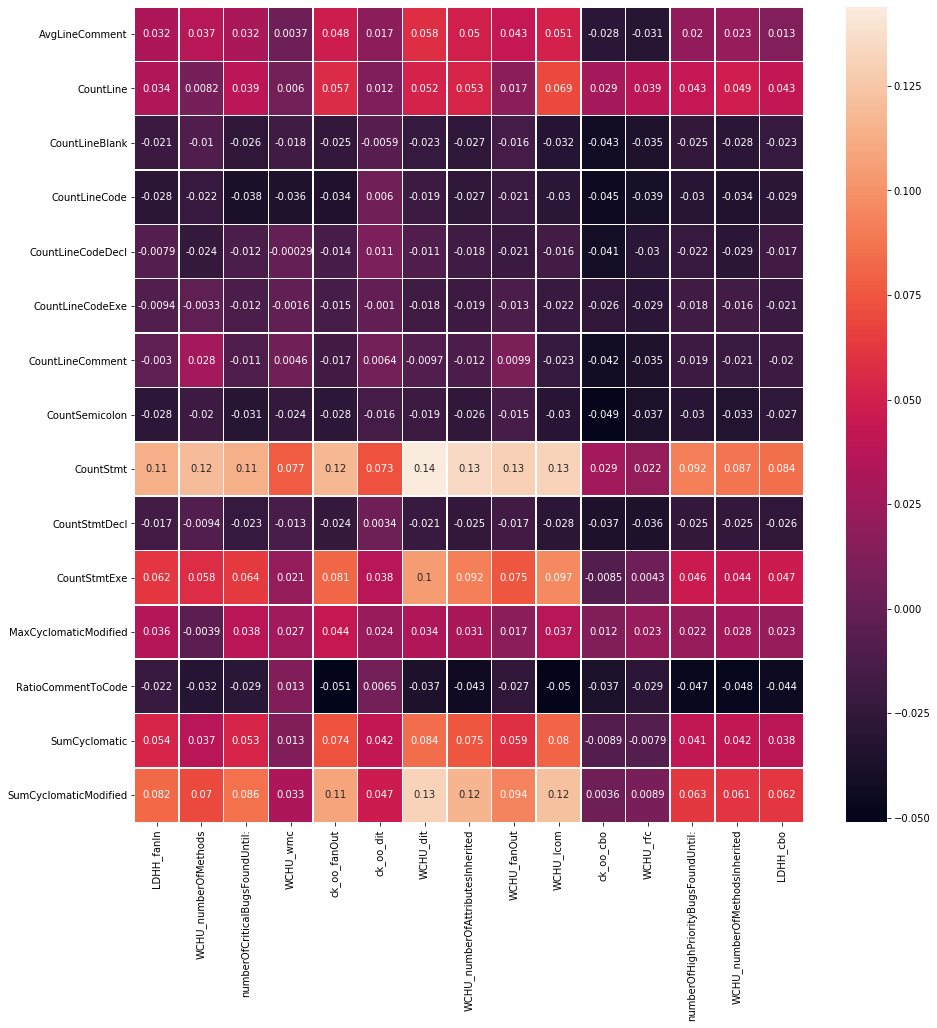

In [33]:
#Testing------------------------------------------------------------------
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))

#corr_data_frame = pd.concat([ar5_matrix, jdt_matrix], axis=1,).corr()
corr_data_frame = pd.concat([ar5_matrix, jdt_matrix], axis=1, keys=['ar5_matrix', 'jdt_matrix']).corr().loc['ar5_matrix', 'jdt_matrix']

#print(corr_data_frame)
svm = sn.heatmap(corr_data_frame, annot=True, linewidths=.5, ax=ax)
ax.set_yticklabels(jdt_fit_selected_columns_name)
ax.set_xticklabels(ar5_fit_selected_columns_name)
plt.yticks(rotation=0) 
plt.xticks(rotation=90)
plt.show()

figure = svm.get_figure()    
figure.savefig('svm_conf.png', dpi=400)

In [26]:
#calculation of correlation
corr_data_frame = pd.concat([ar5_matrix, jdt_matrix], axis=1, keys=['ar5_matrix', 'jdt_matrix']).corr().loc['ar5_matrix', 'jdt_matrix']
corr_metrix = pd.DataFrame(corr_data_frame.values,columns=ar5_fit_selected_columns_name)
corr_metrix['index_name'] = jdt_fit_selected_columns_name
corr_metrix.set_index('index_name', inplace = True)
#print("matix", corr_metrix)
#file = open("matrix_jdt_zing.txt", "w")
#file.write(str(corr_metrix))
#file.close()
#print('asss')

corr_pairs = corr_metrix.unstack()

#print(corr_pairs)
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

                                     index_name           
ck_oo_fanOut                         RatioCommentToCode      -0.051115
WCHU_lcom                            RatioCommentToCode      -0.049867
ck_oo_cbo                            CountSemicolon          -0.048958
WCHU_numberOfMethodsInherited        RatioCommentToCode      -0.048082
numberOfHighPriorityBugsFoundUntil:  RatioCommentToCode      -0.046995
ck_oo_cbo                            CountLineCode           -0.044752
LDHH_cbo                             RatioCommentToCode      -0.044289
WCHU_numberOfAttributesInherited     RatioCommentToCode      -0.043092
ck_oo_cbo                            CountLineBlank          -0.042586
                                     CountLineComment        -0.042382
                                     CountLineCodeDecl       -0.041092
WCHU_rfc                             CountLineCode           -0.038681
numberOfCriticalBugsFoundUntil:      CountLineCode           -0.037936
WCHU_rfc          

In [27]:
strong_pairs = sorted_pairs[(sorted_pairs) > 0.05]

print(strong_pairs.sort_index(axis=0, level=None, ascending=True, inplace=False, sort_remaining=True))

                                     index_name           
LDHH_cbo                             CountStmt                0.084497
                                     SumCyclomaticModified    0.062069
LDHH_fanIn                           CountStmt                0.113890
                                     CountStmtExe             0.062345
                                     SumCyclomatic            0.053633
                                     SumCyclomaticModified    0.082236
WCHU_dit                             AvgLineComment           0.058467
                                     CountLine                0.052273
                                     CountStmt                0.143900
                                     CountStmtExe             0.104959
                                     SumCyclomatic            0.084313
                                     SumCyclomaticModified    0.130996
WCHU_fanOut                          CountStmt                0.129528
                  

In [58]:
corr_concat = pd.concat([ar5_matrix, jdt_matrix], axis=1, keys=['ar5_matrix', 'jdt_matrix'])
cov = np.cov(corr_concat.T)

print(str(cov))

[[         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...          nan          nan
           nan]
 ...
 [         nan          nan          nan ... 489.5860755  187.79626127
  158.91734071]
 [         nan          nan          nan ... 187.79626127 398.69556662
   76.65341327]
 [         nan          nan          nan ... 158.91734071  76.65341327
   74.06834005]]


In [43]:

stds = np.std(corr_concat, axis = 0) #shape = (6,)

stds_matrix = np.array([[stds[i]*stds[j] for j in range(52)] for i in range(52)])

print("standard deviations matrix of shape:",stds_matrix.shape)

standard deviations matrix of shape: (52, 52)


In [44]:
new_corr = cov/stds_matrix

In [56]:
pd.options.display.max_seq_items = 2000
print(str(new_corr))

[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ... 1.00100402 0.42548821 0.835365  ]
 [       nan        nan        nan ... 0.42548821 1.00100402 0.44650909]
 [       nan        nan        nan ... 0.835365   0.44650909 1.00100402]]
